In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Omega_m(a):
    return 2*a**3/(1-3*a**2+2*a**3)

def Omega_lambda(a):
    return 1/(1-3*a**2+2*a**3)

In [3]:
a_star = np.linspace(0, 0.6, 1000)
a_star_1 = np.linspace(1.1, 1000, 2000)
Omega_m_list_1 = np.linspace(0, 3, 1000)

In [4]:
def test_fun_y1(m):
    return 4*m*np.cos((1/3)*np.arccos(1/m-1)+4*np.pi/3)**3
def test_fun_y2(m):
    return 4*m*np.cos((1/3)*np.arccos(1/m-1))**3

In [5]:
Omega_m_test = np.linspace(1, 100, 1000)

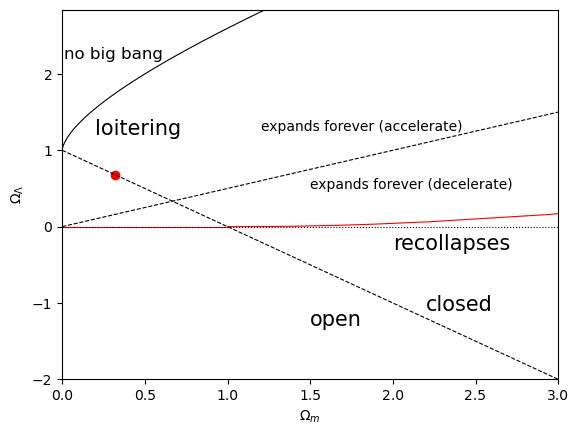

In [6]:
plt.plot(Omega_m(a_star), Omega_lambda(a_star), linewidth = 0.8, color = 'black')
plt.plot(Omega_m(a_star_1), Omega_lambda(a_star_1), color='red', linewidth = 0.8, label='discussed boundary')
plt.plot(Omega_m_list_1, -Omega_m_list_1+1, linestyle = '--', linewidth = 0.8, color = 'black')
plt.plot(Omega_m_list_1, (1/2)*Omega_m_list_1, linestyle = '--', linewidth = 0.8, color = 'black')
#plt.plot(Omega_m_test, test_fun_y1(Omega_m_test), linestyle='-.', color='blue', label=r'boundary solution $y_{1}$')
#plt.plot(Omega_m_test, test_fun_y2(Omega_m_test), linestyle='-.', color='green', label=r'boundary solution $y_{0}$')
plt.axhline(y = 0, color = 'red', xmin = 0, xmax = 1/3, linewidth = 0.8)
plt.axhline(y = 0, linestyle=':', color='black', linewidth = 0.8)
plt.xlim(0, 5*a_star[-1])
plt.ylim(-2, max(Omega_lambda(a_star)))
plt.xlabel(r'$\Omega_{m}$')
plt.ylabel(r'$\Omega_{\Lambda}$')
plt.text(0.01, 2.2, 'no big bang', fontsize = 12)
plt.text(1.5, 0.5, 'expands forever (decelerate)', fontsize = 10)
plt.text(1.2, 1.25, 'expands forever (accelerate)', fontsize = 10)
plt.text(2.0, -0.3, 'recollapses', fontsize = 15)
plt.text(2.2, -1.1, 'closed', fontsize = 15)
plt.text(1.5, -1.3, 'open', fontsize = 15)
plt.text(0.2, 1.2, 'loitering', fontsize = 15)
plt.scatter(0.32, 0.68, color = 'red')
#plt.legend()
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/Cosmology_HW4_discussion.pdf')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/GR/HWs/GR_HW4_figure.pdf')
plt.show()

In [7]:
from scipy.integrate import solve_ivp

In [8]:
def da_dtH0(omega_m, omega_lambda, a):
    dadth0 = np.sqrt(omega_lambda*(a**2-1)+omega_m*(a**(-1)-1)+1)
    return dadth0
def a_evo(t, y, omega_m, omega_lambda):
    a = y[0]
    da_dt = da_dtH0(omega_m, omega_lambda, a)
    return da_dt

In [9]:
t_ini = 0.
t_max = 3
tH0_list = np.linspace(t_ini, t_max, 1000)

In [10]:
# expands forever (accelerate)
Omega_m_sol1 = 1.5
Omega_lambda_sol1 = 1.5
a_ini = [1.]
tH0_rng = [0., t_max]
sol1 = solve_ivp(a_evo, tH0_rng, a_ini, args=(Omega_m_sol1, Omega_lambda_sol1), dense_output=True, atol=1e-9, rtol=1e-7)

In [11]:
# expands forever (decelerate)
Omega_m_sol2 = 1.5
Omega_lambda_sol2 = 0.1
sol2 = solve_ivp(a_evo, tH0_rng, a_ini, args=(Omega_m_sol2, Omega_lambda_sol2), dense_output=True, atol=1e-9, rtol=1e-7)

In [12]:
# loitering
Omega_m_sol3 = 1.2
Omega_lambda_sol3 = 2.8
sol3 = solve_ivp(a_evo, tH0_rng, [0.5], args=(Omega_m_sol3, Omega_lambda_sol3), dense_output=True, atol=1e-9, rtol=1e-7)

In [13]:
# no big bang
Omega_m_sol4 = 0.25
Omega_lambda_sol4 = 2
sol4 = solve_ivp(a_evo, tH0_rng, a_ini, args=(Omega_m_sol4, Omega_lambda_sol4), dense_output=True, atol=1e-9, rtol=1e-7)

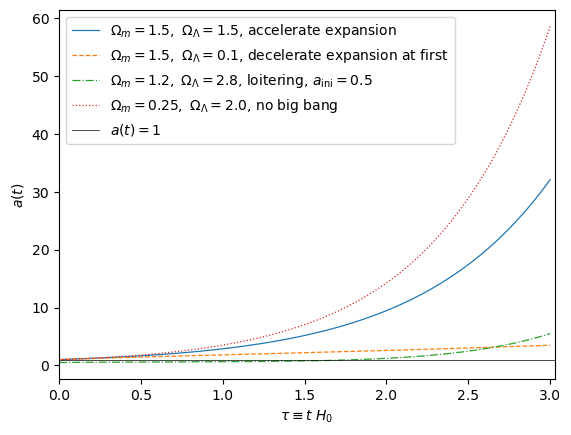

In [14]:
a_evo1 = sol1.sol(tH0_list)[0]
a_evo2 = sol2.sol(tH0_list)[0]
a_evo3 = sol3.sol(tH0_list)[0]
a_evo4 = sol4.sol(tH0_list)[0]
plt.plot(tH0_list, a_evo1, linewidth = 0.9, label=r'$\Omega_{m}=1.5,\ \Omega_{\Lambda}=1.5$, accelerate expansion')
plt.plot(tH0_list, a_evo2, linewidth = 0.9, linestyle = '--', label=r'$\Omega_{m}=1.5,\ \Omega_{\Lambda}=0.1$, decelerate expansion at first')
plt.plot(tH0_list, a_evo3, linewidth = 0.9, linestyle = '-.', label=r'$\Omega_{m}=1.2,\ \Omega_{\Lambda}=2.8$, loitering, $a_{\rm ini}=0.5$')
plt.plot(tH0_list, a_evo4, linewidth = 0.9, linestyle = ':', label=r'$\Omega_{m}=0.25,\ \Omega_{\Lambda}=2.0$, no big bang')
plt.axhline(y=1, color='black', linewidth = 0.5, label=r'$a(t)=1$')
plt.xlim(0, 1.01*max(tH0_list))
plt.xlabel(r'$\tau\equiv t\ H_{0}$')
plt.ylabel(r'$a(t)$')
plt.legend()
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/expansion.pdf')
plt.show()

In [24]:
def a_t_rleation(a, L):
    return 1/(a*np.sqrt((1-L)*a**(-3)+L))
def test(x, a):
    return a*x**3

In [19]:
from scipy.integrate import quad

In [26]:
L_list = np.linspace(0, 0.95, 2000)

In [27]:
t_list = []
for i in range(len(L_list)):
    t_list.append(quad(a_t_rleation, 0, 1, args=(L_list[i], ), limit=1000)[0])

t_list = np.array(t_list)

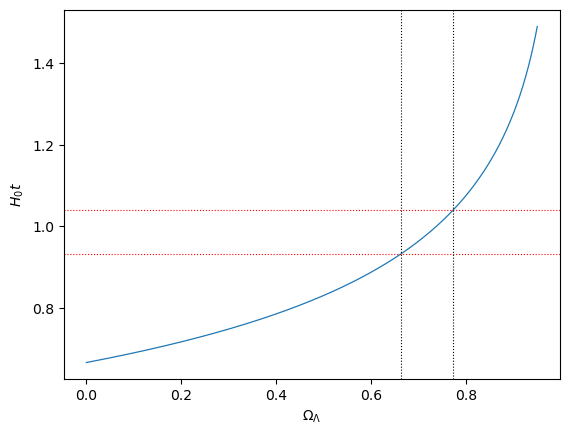

0.6639069534767383 0.7732116058029015


In [ ]:
plt.plot(L_list, t_list, lw = 0.9)
plt.xlabel(r'$\Omega_{\Lambda}$')
plt.ylabel(r'$H_{0}t$')
plt.axhline(y=0.9336, linestyle=':', lw=0.8, color = 'red')
plt.axhline(y=1.0409, linestyle=':', lw=0.8, color = 'red')
plt.axvline(x=L_list[np.argmin(abs(t_list-0.9336))], linestyle=':', lw=0.8, color = 'black')
plt.axvline(x=L_list[np.argmin(abs(t_list-1.0409))], linestyle=':', lw=0.8, color = 'black')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/GR/HWs/GR_HW4_figurea.pdf')
plt.show()
print(L_list[np.argmin(abs(t_list-0.9336))], L_list[np.argmin(abs(t_list-1.0409))])